In [1]:
import os
import shutil
from pathlib import Path

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_DIR = Path('/content/unpacked/')
    PACK_DIR = Path('/content/drive/My Drive/colab_drive/prepacked.zip')
    shutil.copy(PACK_DIR, '/content/')
    !unzip -o -q /content/prepacked.zip -d {DATA_DIR}
else:
    DATA_DIR= Path(os.path.join(os.getcwd(), "../data/")).resolve()
DATA_DIR

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data')

In [4]:
import re
import glob
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# CSV 로드 및 정리, 본인 경로에 맞게 변환
CSV_PATH = DATA_DIR / 'kfold_result_class.csv'
IMAGE_SIZE = (256, 256)

In [5]:
df = pd.read_csv(CSV_PATH, dtype={"id": str})
# 모델 이름을 x축 인덱스로 사용
x = range(len(df))
names = df["name"]

df.head()

,Unnamed: 0,name,acc_mean,acc_std,prec_macro_mean,prec_macro_std,best_f1_macro_mean,best_f1_macro_std,last_f1_macro_mean,last_f1_macro_std
0,3,hl300x2,0.539265,0.014751,0.540555,0.015302,0.522504,0.013446,0.513433,0.015328
1,2,hl300x3,0.545068,0.010901,0.554231,0.019216,0.511060,0.014264,0.498991,0.014582
2,4,cl16_32_64,0.535397,0.010832,0.536960,0.016697,0.506638,0.011692,0.502457,0.010623
3,0,hl300x2_100x2_50x2,0.510251,0.033667,0.566498,0.045067,0.490764,0.017120,0.464768,0.031682
4,1,hl100x4,0.517602,0.006309,0.546708,0.021414,0.488260,0.012076,0.478842,0.018194


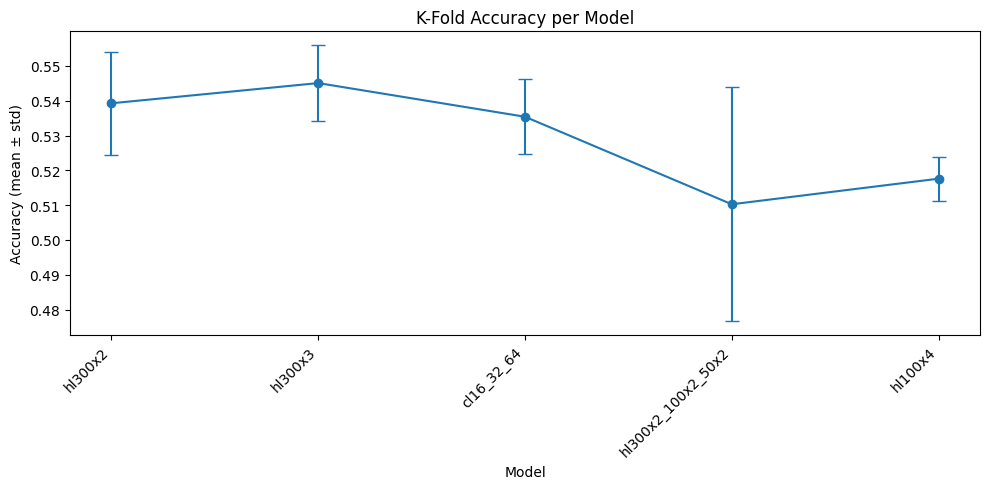

In [6]:
#플롯팅에서 GPT의 조언을 다수 차용하였습니다. fmt, xticks+rotation등...

# 1) Accuracy
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["acc_mean"], yerr=df["acc_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy (mean ± std)")
plt.title("K-Fold Accuracy per Model")
plt.tight_layout()
plt.show()

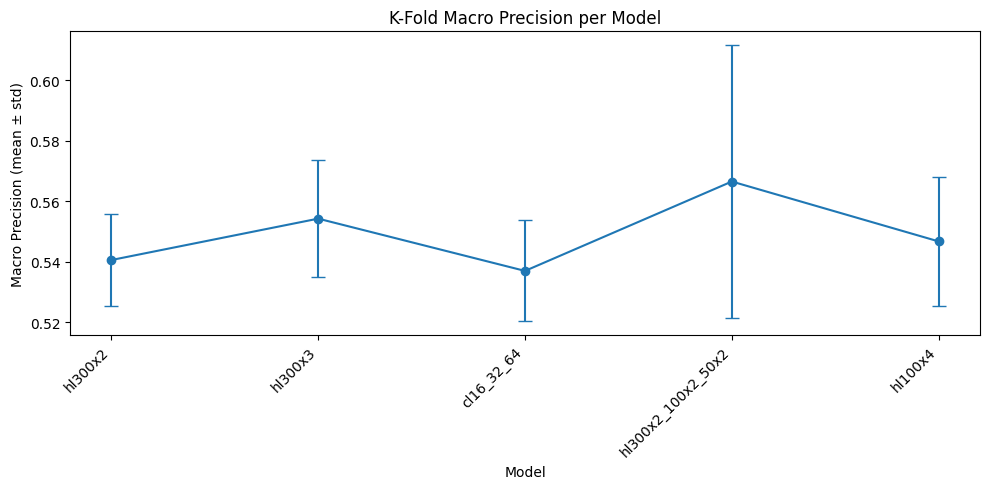

In [9]:
# 2) Macro Precision plot 
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["prec_macro_mean"], yerr=df["prec_macro_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Macro Precision (mean ± std)")
plt.title("K-Fold Macro Precision per Model")
plt.tight_layout()
plt.show()

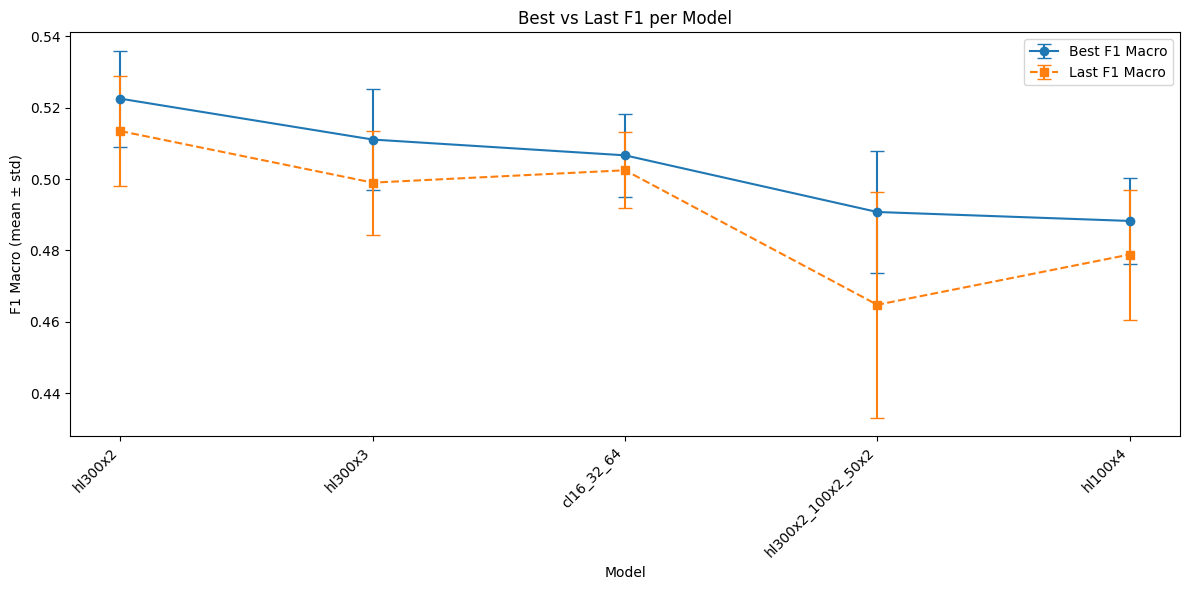

In [8]:
# 3) Best F1 vs Last F1 plot 
plt.figure(figsize=(12, 6))
plt.errorbar(
    x, df["best_f1_macro_mean"], yerr=df["best_f1_macro_std"],
    fmt='o-', capsize=5, label="Best F1 Macro"
)
plt.errorbar(
    x, df["last_f1_macro_mean"], yerr=df["last_f1_macro_std"],
    fmt='s--', capsize=5, label="Last F1 Macro"
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("F1 Macro (mean ± std)")
plt.title("Best vs Last F1 per Model")
plt.legend()
plt.tight_layout()
plt.show()